This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. The 23 variables are all categorical.
In the following notebook, we will use veil color as the response variable and will create decision tree and random forest models should be designed for purposes of predicting which of the four veil-color values is most likely to apply to a given observation.

In [236]:
import pandas as pd

In [237]:
#load the data
df=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/M11DATA/master/M11_Data.csv')

In [238]:
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In [239]:
#look at the type of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
p      8123 non-null object
x      8123 non-null object
s      8123 non-null object
n      8123 non-null object
t      8123 non-null object
p.1    8123 non-null object
f      8123 non-null object
c      8123 non-null object
n.1    8123 non-null object
k      8123 non-null object
e      8123 non-null object
e.1    8123 non-null object
s.1    8123 non-null object
s.2    8123 non-null object
w      8123 non-null object
w.1    8123 non-null object
p.2    8123 non-null object
w.2    8123 non-null object
o      8123 non-null object
p.3    8123 non-null object
k.1    8123 non-null object
s.3    8123 non-null object
u      8123 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [240]:
#rename the column
df.rename(columns={'x': 'cap-shape', 's': 'cap-surface','n': 'cap-color','t':'bruises','p.1':'odor','f':'gill_attachment','c':'gill-spacing','n.1':'gill-size','k':'gill_color','e':'stalk_shape','e.1':'stalk_root','s.1':'stalk-surface-above-ring' ,'s.2':'stalk-surface-below-ring','w':'stalk-color-above-ring','w.1':'stalk-color-below-ring','p.2':'veil-type','w.2':'veil-color','o':'ring-number','p.3':'ring_type','k.1':'spore-print-color','s.3':'population','u':'habitat'}, inplace=True)
df.rename(columns={'p': 'class_x'}, inplace=True)

In [241]:
 df.head()

,class_x,cap-shape,cap-surface,cap-color,bruises,odor,gill_attachment,gill-spacing,gill-size,gill_color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring_type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


# EDA

in the next graph we are going to look at the distribution of some of the variables of the dataset 

In [242]:
import matplotlib. pyplot as plt
import seaborn as sns

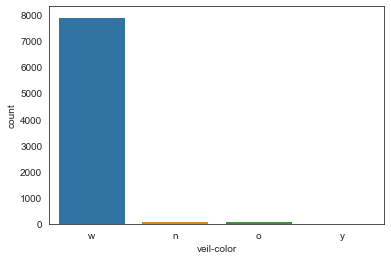

In [243]:
#Barplot of the response variable 
sns.countplot(data = df, x = 'veil-color')

Looking at the response variable we can see that the data is unbalanced with most of the mushrooms having a white color.

In [244]:
#creating a function to countplot features to see breakout, input column name
                       
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(df[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

    plt.show()

In [245]:
#creating a function to countplot features to see breakout, input column name
                       
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(df[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

    plt.show()

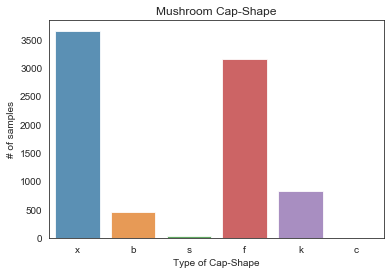

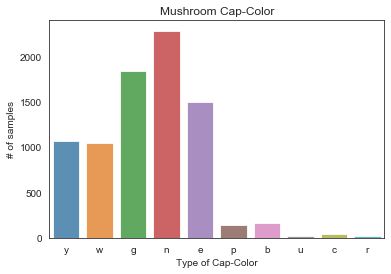

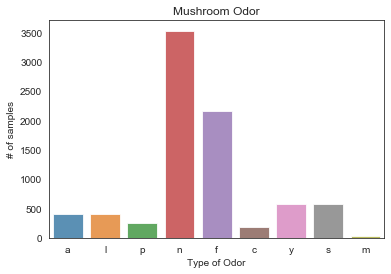

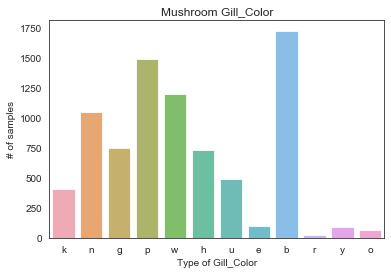

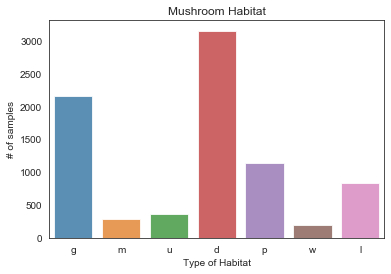

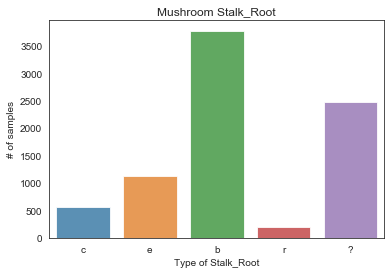

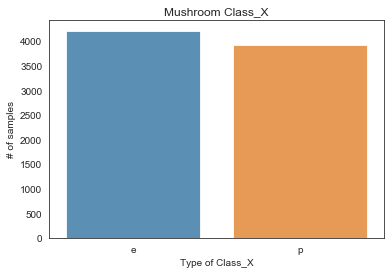

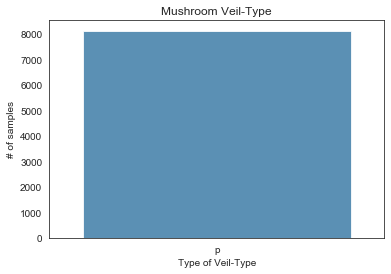

In [246]:
#distribution of some features 
featureplot('cap-shape')
featureplot('cap-color')
featureplot('odor')
featureplot('gill_color')
featureplot('habitat')
featureplot('stalk_root')
featureplot('class_x')
featureplot('veil-type')

Looking at these different bar plot we can see that most of the mushrooms have a convex(x) cape shape, A brown(n) cape color,none odor(n),black gill color(b), a woods(d) habitat,bulbous(b) stalk root.
We can also see tha there is almost as much poisenous mushroom than edible mushroom.
We can also see that for the veil type they are all partial so we should delete this column 

In [247]:
#delete veil color
del df['veil-type']

In [248]:
#WE are going to use a labelencoded dataframe only for the correlation matrix to see which variables are correlated 
df1=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/M11DATA/master/M11_Data.csv')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df1.columns:
    df1[column] = labelencoder.fit_transform(df1[column])

In [249]:
df1.rename(columns={'x': 'cap-shape', 's': 'cap-surface','n': 'cap-color','t':'bruises','p.1':'odor','f':'gill_attachment','c':'gill-spacing','n.1':'gill-size','k':'gill_color','e':'stalk_shape','e.1':'stalk_root','s.1':'stalk-surface-above-ring' ,'s.2':'stalk-surface-below-ring','w':'stalk-color-above-ring','w.1':'stalk-color-below-ring','p.2':'veil-type','w.2':'veil-color','o':'ring-number','p.3':'ring_type','k.1':'spore-print-color','s.3':'population','u':'habitat'}, inplace=True)
df1.rename(columns={'p': 'class_x'}, inplace=True)

In [250]:
del df1['veil-type']

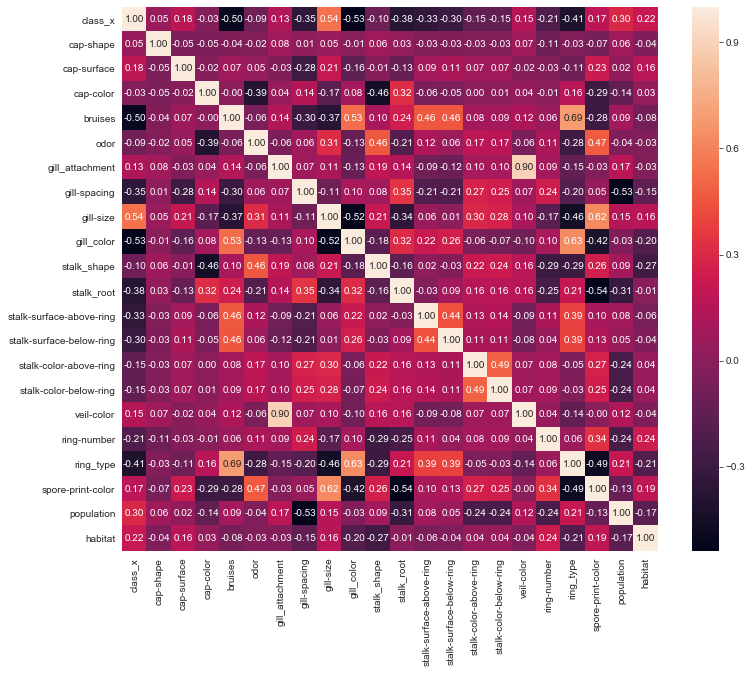

In [251]:
#correlation Matrix
#correlation matrix heatmap
corrMatrix = df1.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

We can see that gil_attachment is highly  positively correlated with the response variable(0.90)
Class and gill size, ring_type and bruised also have a big correlation.

# Feature selection 

In order to selct the variables we will use in our model we will use chi 2 for feature selection

In [252]:
X=df.drop(["veil-color"],1)
y=df['veil-color']

In [253]:
#prepare the predictive variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
 

oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)


In [254]:
#prepare the response variable 
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)


In [255]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 

In [256]:
#chi 2 selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_enc, y_enc)
X_fs = fs.transform(X_enc)


Feature 0: 99.037798
Feature 1: 50.579092
Feature 2: 9.261166
Feature 3: 46.848899
Feature 4: 85.195002
Feature 5: 36.207075
Feature 6: 191.564284
Feature 7: 66.295380
Feature 8: 72.887054
Feature 9: 315.149238
Feature 10: 116.319576
Feature 11: 223.576296
Feature 12: 33.021624
Feature 13: 29.141661
Feature 14: 28.971862
Feature 15: 28.029229
Feature 16: 0.924334
Feature 17: 268.085405
Feature 18: 27.119748
Feature 19: 86.323065
Feature 20: 32.885342


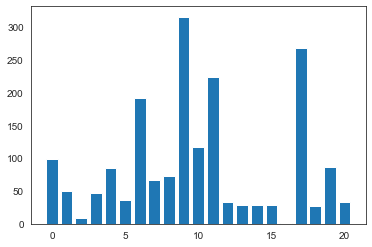

In [257]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

We are going to keep the variables that have the highest scores.
Looking at the graph we can see that 100 was a reasonable threshhold, 4and 20 were very closed to 100 and could be good candidates to test into different models so we are also going to keep them.
Thus, the variables that we will keep for our model are :0,4,6,9,10,11,16,19

In [258]:
#that is  the name of the variable we will use after feature selection 
my_features=list(X.columns[[0,4,6,9,10,11,17,19]])
my_features

['class_x',
 'bruises',
 'gill_attachment',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'ring_type',
 'population']

# Decision tree models and  random forest models 

In [259]:
#create a dataframe with only the variables i have chosen
df2=df[my_features]
df2 = pd.concat([df2, df['veil-color']], axis=1)
df2.head()

,class_x,bruises,gill_attachment,gill_color,stalk_shape,stalk_root,ring_type,population,veil-color
0,e,t,f,k,e,c,p,n,w
1,e,t,f,n,e,c,p,n,w
2,p,t,f,n,e,e,p,s,w
3,e,f,f,k,t,e,e,a,w
4,e,t,f,n,e,c,p,n,w


In [260]:
#convert the predictive variables into dummies
cl=pd.get_dummies(df2.class_x, prefix='class')
df2 = pd.concat([df2, cl], axis=1)
br=pd.get_dummies(df2.bruises, prefix='bruises')
df2 = pd.concat([df2, br], axis=1)
G=pd.get_dummies(df2.gill_attachment, prefix='gill_attachment')
df2 = pd.concat([df2, G], axis=1)
colo=pd.get_dummies(df2.gill_color, prefix='gill_color')
df2 = pd.concat([df2, colo], axis=1)
ss=pd.get_dummies(df2.stalk_shape, prefix='stalk_shape')
df2 = pd.concat([df2, ss], axis=1)
sr=pd.get_dummies(df2.stalk_root, prefix='stalk_root')
df2 = pd.concat([df2, sr], axis=1)
rt=pd.get_dummies(df2.ring_type, prefix='ring_type')
df2 = pd.concat([df2, rt], axis=1)
pop=pd.get_dummies(df2.population, prefix='population')
df2 = pd.concat([df2, pop], axis=1)


In [261]:
#delete the original columns that we have converted into dummy
del df2['class_x']
del df2['bruises']
del df2['gill_attachment']
del df2['gill_color']
del df2['stalk_shape']
del df2['stalk_root']
del df2['ring_type']
del df2['population']


In [262]:
#for the first model we will use teh 8 variables selected before
X1=df2.drop(["veil-color"],1)
Y1=df2['veil-color']

In [263]:
#split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.3, random_state=10)

In [264]:
x1_train=x_train
x1_test=x_test

In [265]:
from sklearn.tree import DecisionTreeClassifier

In [266]:
#decision tree model
clf = DecisionTreeClassifier(criterion = 'entropy')

In [267]:
#Training the decision tree classifier. 
clf.fit(x1_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [268]:
#Predicting labels on the test set.
y_pred =  clf.predict(x1_test)

In [269]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x1_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))


Accuracy Score on train data:  0.9896236370031657
Accuracy Score on test data:  0.9848173984407058


The first model has similar accuracy on the test and train data.
The Accuracy score is very high.

In [270]:
df2.columns

Index(['veil-color', 'class_e', 'class_p', 'bruises_f', 'bruises_t',
       'gill_attachment_a', 'gill_attachment_f', 'gill_color_b',
       'gill_color_e', 'gill_color_g', 'gill_color_h', 'gill_color_k',
       'gill_color_n', 'gill_color_o', 'gill_color_p', 'gill_color_r',
       'gill_color_u', 'gill_color_w', 'gill_color_y', 'stalk_shape_e',
       'stalk_shape_t', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c',
       'stalk_root_e', 'stalk_root_r', 'ring_type_e', 'ring_type_f',
       'ring_type_l', 'ring_type_n', 'ring_type_p', 'population_a',
       'population_c', 'population_n', 'population_s', 'population_v',
       'population_y'],
      dtype='object')

In [271]:
#for model 2 we are going to drop the population column and the bruises column since they had the lowest chi 2 score form the variable selected.

x2_train=x1_train.drop(['population_a','population_c','population_n','population_s','population_v','population_y','bruises_f', 'bruises_t',],1)
x2_test=x1_test.drop(['population_a','population_c','population_n','population_s','population_v','population_y','bruises_f', 'bruises_t'],1)


In [272]:
#Training the decision tree classifier for model 2 . 
clf.fit(x2_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [273]:
#Predicting labels on the test set.
y_pred2 =  clf.predict(x2_test)
y_pred2

array(['w', 'w', 'w', ..., 'n', 'w', 'w'], dtype=object)

In [274]:
#Random forest for model 1
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x1_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x1_test,y_test)*100,2)))

Test Accuracy: 98.48%


In [275]:
y_pred3 =  rf.predict(x1_test)
y_pred3

array(['w', 'w', 'w', ..., 'n', 'w', 'w'], dtype=object)

In [276]:
#random forest for model 2
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(x2_train,y_train)
print("Test Accuracy: {}%".format(round(rf2.score(x2_test,y_test)*100,2)))

Test Accuracy: 98.6%


In [277]:
y_pred4 =  rf2.predict(x2_test)
y_pred4

array(['w', 'w', 'w', ..., 'n', 'w', 'w'], dtype=object)

# Best model

before making the choice of the best model we are going to look at the classification report of each model

In [278]:
#for model 1 (decision tree)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['w', 'y', 'n','o']))



Classification Report

              precision    recall  f1-score   support

           w       0.33      0.19      0.24        31
           y       0.34      0.52      0.41        25
           n       1.00      1.00      1.00      2377
           o       1.00      1.00      1.00         4

    accuracy                           0.98      2437
   macro avg       0.67      0.68      0.66      2437
weighted avg       0.98      0.98      0.98      2437



In [279]:
#FOR MODEL 2 (decision tree)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2, target_names=['w', 'y', 'n','o']))



Classification Report

              precision    recall  f1-score   support

           w       0.43      0.29      0.35        31
           y       0.37      0.52      0.43        25
           n       1.00      1.00      1.00      2377
           o       1.00      1.00      1.00         4

    accuracy                           0.99      2437
   macro avg       0.70      0.70      0.69      2437
weighted avg       0.99      0.99      0.99      2437



In [280]:
#MODEL 1(random forest)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred3, target_names=['w', 'y', 'n','o']))



Classification Report

              precision    recall  f1-score   support

           w       0.33      0.19      0.24        31
           y       0.34      0.52      0.41        25
           n       1.00      1.00      1.00      2377
           o       1.00      1.00      1.00         4

    accuracy                           0.98      2437
   macro avg       0.67      0.68      0.66      2437
weighted avg       0.98      0.98      0.98      2437



In [281]:
#MODEL 2(random forest)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred4, target_names=['w', 'y', 'n','o']))



Classification Report

              precision    recall  f1-score   support

           w       0.43      0.29      0.35        31
           y       0.37      0.52      0.43        25
           n       1.00      1.00      1.00      2377
           o       1.00      1.00      1.00         4

    accuracy                           0.99      2437
   macro avg       0.70      0.70      0.69      2437
weighted avg       0.99      0.99      0.99      2437



The accuracy for the 4 model are very similar and high.However since the response variable is unbalanced we can not make our choice of the best model based on the accuracy results. 
We are not going to keep the model 2 of the decision tree and random forest  since for w and y  model have better F1 and  precision score, it has a score of 0 for n and o.
The results for decision tree and random forest are the same so we are going to keep the model 1.

In [286]:
##decision tree model model 1 testing dataset
clft = DecisionTreeClassifier(criterion = 'entropy')

In [287]:
#Training the decision tree classifier. 
clft.fit(x1_test, y_test)

DecisionTreeClassifier(criterion='entropy')

In [288]:
#Predicting labels on the test set.
y_predtest =  clft.predict(x1_test)
y_predtest

array(['w', 'w', 'w', ..., 'o', 'w', 'w'], dtype=object)

In [289]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predtest, target_names=['w', 'y', 'n','o']))



Classification Report

              precision    recall  f1-score   support

           w       0.63      0.94      0.75        31
           y       0.80      0.32      0.46        25
           n       1.00      1.00      1.00      2377
           o       1.00      1.00      1.00         4

    accuracy                           0.99      2437
   macro avg       0.86      0.81      0.80      2437
weighted avg       0.99      0.99      0.99      2437



The metrics results on the testing shows very good results of the accuracy but also on the precision, recall and f1 score.
Thus this model was a good choice

# conclusion 


We have constructed 2 different decision trees model and 2 random forest model in order to predict which of the four veil-color values is most likely to apply to a given observation.


